**REGRESIÓN LINEAL CON PYTHON**

**Introducción**


La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

**Modelos de regresión lineal en Python**

Dos de las implementaciones de modelos de regresión lineal más utilizadas en Python son: **scikit-learn** y **statsmodels**. Aunque ambas están muy optimizadas, Scikit-learn está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. Statsmodels es mucho más completo en este sentido. 

**Definición matemática**


El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones $\{y_i,x_{i1},x_{i2},\ldots,x_{ip}\}^n_{i=1},$ la media *μ* de la variable respuesta $y$ se relaciona de forma lineal con la o las variables regresoras $x_1,x_2,\ldots,x_p$ acorde a la ecuación:

 <center>$μ_y=β_0+β_1x_1+β_2x_2+\cdots+β_px_p$ </center>

El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y la media de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:

<center>$y_i=β_0+β_1x_{i1}+β_2x_{i2}+\cdots+β_px_{ip}+\epsilon_i, i=1,2,\ldots, n$</center>

En este caso, se está haciendo referencia al valor de $y$ para una observación $i$ concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error $\epsilon_i$.

En ambos casos, la interpretación de los elementos del modelo es la misma:

* $β_0$: es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta $y$ cuando todos los predictores son cero.

* $β_j$ : es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora $x_j$ , manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

* $\epsilon_i$: es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en $y$ pero que no se incluyen en el modelo como predictores.

En la gran mayoría de casos, los valores $β_0$ y $β_j$ poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones $\hat{β}_0$ y $\hat{β}_j$. Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (likelihood), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

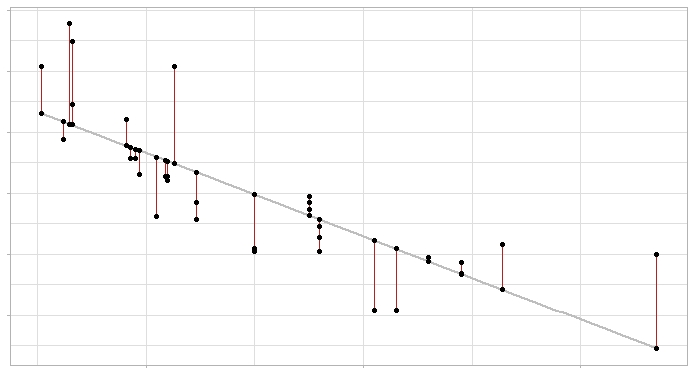

*Modelo de regresión lineal y sus errores: la línea gris representa la recta de regresión (el modelo) y los segmentos rojos el error entre esta y cada observación.*



Computacionalmente, estos cálculos son más eficientes si se realizan de forma matricial:

$$
\mathbf{y}=\mathbf{X}^{T}\beta + \epsilon
$$

$$
 \mathbf{y}=\left[\begin{array}{c} y_1 \\ y_2\\ \cdots \\y_n    \end{array} \right],
\mathbf{X}=\left[
\begin{array}{cccc}
1 & x_{11} & x_{12}&\cdots& x_{1p} \\
1 & x_{21} & x_{22}&\cdots& x_{2p}\\
1 & \cdots & \cdots& \cdots\\
1 & x_{n1} & x_{n2}&\cdots& x_{np}\\
\end{array}
\right],
\beta=\left[\begin{array}{c} \beta_0 \\ \beta_1\\ \cdots \\\beta_p    \end{array} \right],
\epsilon=\left[\begin{array}{c} \epsilon_1 \\ \epsilon_2\\ \cdots \\\epsilon_n    \end{array} \right]
$$

$$
\hat{\beta} = \underset{\beta}{\arg\min} (\mathbf{y} - \mathbf{X}^T \mathbf{\beta})^2
$$

Una vez estimados los coeficientes, se pueden obtener las estimaciones de cada observación ($\hat{y}_i$):

$$\hat{y}_i= \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + ... + \hat{\beta}_p x_{ip}$$

Finalmente, la estimación de la varianza del modelo ($\hat{\sigma}^2$) se obtiene como:

$$
\hat{\sigma}^2 = \frac{\sum^n_{i=1} \hat{\epsilon}_i^2}{n-p} = \frac{\sum^n_{i=1} (y_i - \hat{y}_i)^2}{n-p}
$$

donde *n* es el número de observaciones y *p* el número de predictores. 

**Interpretación del modelo**

Los principales elementos que hay que interpretar en un modelo de regresión lineal son los coeficientes de los predictores:
 * $\beta_0$:es la ordenada en el origen o intercept, se corresponde con el valor esperado de la variable respuesta y cuando todos los predictores son cero.

* $\beta_j$: los coeficientes de regresión parcial de cada predictor indican el cambio promedio esperado de la variable respuesta $y$ al incrementar en una unidad de la variable predictora $x_j$, manteniéndose constantes el resto de variables.

La magnitud de cada coeficiente parcial de regresión depende de las unidades en las que se mida la variable predictora a la que corresponde, por lo que su magnitud no está asociada con la importancia de cada predictor.

Para poder determinar qué impacto tienen en el modelo cada una de las variables, se emplean los coeficientes parciales estandarizados, que se obtienen al estandarizar (sustraer la media y dividir entre la desviación estándar) las variables predictoras previo ajuste del modelo. En este caso, $\beta_0$ se corresponde con el valor esperado de la variable respuesta cuando todos los predictores se encuentran en su valor promedio, y $\beta_j$ el cambio promedio esperado de la variable respuesta al incrementar en una desviación estándar la variable predictora $x_j$, manteniéndose constantes el resto de variables.

Si bien los coeficientes de regresión suelen ser el primer objetivo de la interpretación de un modelo lineal, existen muchos otros aspectos (significancia del modelo en su conjunto, significancia de los predictores, condición de normalidad...). Estos últimos suelen ser tratados con poca detalle cuando el único objetivo del modelo es realizar predicciones, sin embargo, son muy relevantes si se quiere realizar inferencia, es decir, explicar las relaciones entre los predictores y la variable respuesta. A lo largo de este documento se irán introduciendo cada uno de ellos. 

**Significado "lineal"**

El término *"lineal"* en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón lineal.

La siguiente ecuación muestra un modelo lineal en el que el predictor $x_1$ no es lineal respecto a $y$:

$$
y = \beta_0 + \beta_1x_1 + \beta_2log(x_1) + \epsilon
$$
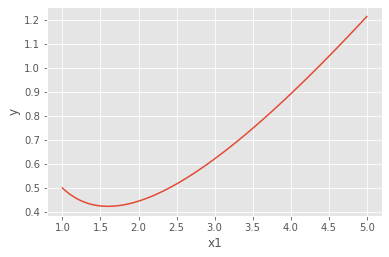



En contraposición, el siguiente no es un modelo lineal:

$$
y = \beta_0 + \beta_1x_1^{\beta_2} + \epsilon
$$

En ocasiones, algunas relaciones no lineales pueden transformarse de forma que se pueden expresar de manera lineal:

$$
y = \beta_0x_1^{\beta_1}\epsilon
$$

$$
log(y)=log(\beta_0) + \beta_1log(x_1) + log(\epsilon)
$$

**Ejemplo Regresión Lineal Simple**

Solución del Capitulo de regresión Lineal Simple del libro Canavos.

**Librerías**

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


**Datos**

In [3]:
# Datos
# ==============================================================================
datos = pd.read_csv("ejemplo.csv")
#datos.head(10)
datos

,CALIFICACIÓN PROMEDIO,SALARIO INICIAL
0,2.95,18.5
1,3.20,20.0
2,3.40,21.1
3,3.60,22.4
4,3.20,21.2
5,2.85,15.0
6,3.10,18.0
7,2.85,18.8
8,3.05,15.7
9,2.70,14.4


**Representación gráfica**

El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

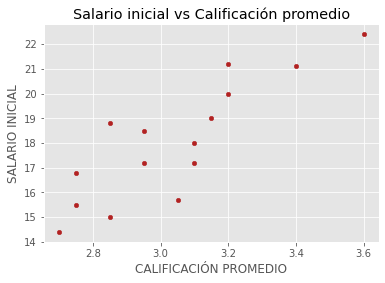

In [4]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots()

datos.plot(
    x    = 'CALIFICACIÓN PROMEDIO',
    y    = 'SALARIO INICIAL',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Salario inicial vs Calificación promedio');

In [5]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['CALIFICACIÓN PROMEDIO'], y =  datos['SALARIO INICIAL'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8476342100087885
P-value:  6.59819025231516e-05


In [6]:
# División de los datos en train y test
# ==============================================================================
X = datos[['CALIFICACIÓN PROMEDIO']]
print(X.values.reshape(-1,1))
y = datos['SALARIO INICIAL']
print(y)
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

[[2.95]
 [3.2 ]
 [3.4 ]
 [3.6 ]
 [3.2 ]
 [2.85]
 [3.1 ]
 [2.85]
 [3.05]
 [2.7 ]
 [2.75]
 [3.1 ]
 [3.15]
 [2.95]
 [2.75]]
0     18.5
1     20.0
2     21.1
3     22.4
4     21.2
5     15.0
6     18.0
7     18.8
8     15.7
9     14.4
10    15.5
11    17.2
12    19.0
13    17.2
14    16.8
Name: SALARIO INICIAL, dtype: float64


LinearRegression()

In [7]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X_train, y_train))

Intercept: [-7.21131985]
Coeficiente: [('CALIFICACIÓN PROMEDIO', 8.31791907514451)]
Coeficiente de determinación R^2: 0.752900429773425


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [8]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(X_test)
print(y_test)
print(predicciones)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



[[2.95]
 [3.1 ]
 [2.95]]
[[17.2]
 [17.2]
 [18.5]]
[[17.32654143]
 [18.57422929]
 [17.32654143]]

El error (rmse) de test es: 1.0458686806135336


[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 0.00987476]
 [ 1.13704239]
 [ 0.03039499]
 [-0.16295761]
 [ 2.30525048]
 [ 0.59397881]
 [-0.84706166]
 [-2.45833333]
 [ 1.79397881]
 [-1.49474952]
 [-0.57422929]
 [-0.33318882]]


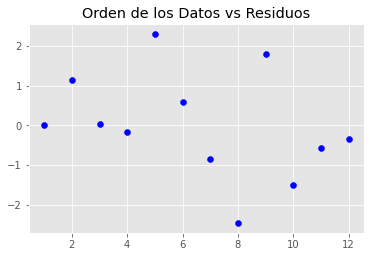

In [9]:
# Residuales
# ==============================================================================

estimaciones = modelo.predict(X = X_train)
residuales = y_train - estimaciones
x = np.arange(1,residuales.size+1)
print(x)
print(residuales)

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(x, residuales, marker='o', color = "blue")
ax.set_title('Orden de los Datos vs Residuos');


**Statsmodels**

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

  *  Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

  *  Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.



In [10]:
# División de los datos en train y test
# ==============================================================================
X = datos[['CALIFICACIÓN PROMEDIO']]
y = datos['SALARIO INICIAL']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
print(X_train.shape)
print(X_train.reshape(-1, 1))

(12, 1)
[[3.15]
 [2.75]
 [3.4 ]
 [2.75]
 [2.85]
 [3.2 ]
 [2.7 ]
 [3.05]
 [3.2 ]
 [2.85]
 [3.1 ]
 [3.6 ]]


In [11]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)),columns=['CALIFICACIÓN_PROMEDIO','SALARIO_INICIAL'])
datos_train
modelo = smf.ols(formula = 'SALARIO_INICIAL ~CALIFICACIÓN_PROMEDIO', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARIO_INICIAL   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     30.47
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000255
Time:                        07:10:26   Log-Likelihood:                -19.984
No. Observations:                  12   AIC:                             43.97
Df Residuals:                      10   BIC:                             44.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -7.21

In [12]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     30.47
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000255
Time:                        07:10:26   Log-Likelihood:                -19.984
No. Observations:                  12   AIC:                             43.97
Df Residuals:                      10   BIC:                             44.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2113      4.614     -1.563      0.1

**Intervalos de confianza de los coeficientes**


In [13]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-17.49148642,   3.06884673],
       [  4.96035612,  11.67548203]])


**Predicciones**


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

   * .predict(): devuelve únicamente el valor de las predicciones.

   * .get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.



In [14]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,18.990125,0.431727,18.028177,19.952073,15.722605,22.257645
1,15.662958,0.606668,14.311217,17.014698,12.260231,19.065684
2,21.069605,0.664714,19.588530,22.550680,17.613462,24.525748
3,15.662958,0.606668,14.311217,17.014698,12.260231,19.065684



**Representación gráfica del modelo**


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.


6     14.4
1     16.8
3     15.5
4     18.8
9     15.0
7     15.7
10    18.0
0     19.0
5     20.0
8     21.2
2     21.1
11    22.4
Name: y, dtype: float64


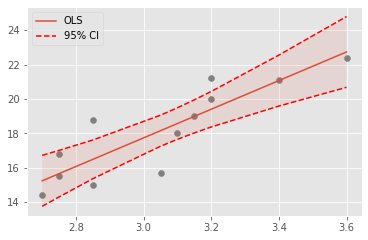

In [15]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')
print(predicciones['y'])
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

**Error de test**

In [16]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.045868680613534


**Interpretación**

La columna *(coef)* devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal $(\hat{\beta}_0 y \hat{\beta}_1)$ que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico *t* y el *p-value* (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas *(p-values < 0.05)*.

El valor de R-squared indica que el modelo es capaz de explicar el 75.3% de la variabilidad observada en la variable respuesta *(SALARIO_INICIAL)*. Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.000255) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:
$$
SALARIOINICIAL = -7.2113  + 8.3179CALIFICACIÓNPROMEDIO
$$

Por cada unidad que se incrementa el número la CALIFICACIÓN_PROMEDIO, el SALARIO_INICIAL aumenta en promedio 8.3179 unidades.

El error de test del modelo es de 1.046. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.
